In [1]:
import sklearn as sk
import pandas as pd
import time
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import KFold
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

data=pd.read_csv('../data/feature1.csv')

C:\Users\Yuyoo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data

,id,heartrate_max,sysbp_max,diasbp_max,meanbp_max,resprate_max,spo2_max,tempc_max,heartrate_min,sysbp_min,...,plt_min,lactate_min,alt_min,ast_min,creatinine_min,bun_min,aptt_min,pt_min,inr_min,label
0,0,70.0,194.0,66.0,102.000000,26.0,100.0,38.777779,45.0,133.0,...,144.0,NaN,NaN,NaN,1.0,24.0,26.1,12.6,1.1,0
1,1,144.0,197.0,111.0,137.000000,42.0,100.0,39.888891,99.0,84.0,...,22.0,6.8,167.0,240.0,2.2,22.0,36.5,16.5,1.8,0
2,2,122.0,138.0,84.0,94.000000,24.0,100.0,37.277778,95.0,78.0,...,183.0,NaN,38.0,45.0,0.8,9.0,29.4,13.5,1.3,0
3,3,87.0,152.0,72.0,99.000000,29.0,98.0,36.400002,71.0,75.0,...,37.0,5.0,87.0,125.0,2.4,69.0,36.8,15.5,1.6,0
4,4,105.0,132.0,98.0,106.000000,42.0,100.0,37.388889,82.0,89.0,...,339.0,0.8,21.0,46.0,0.7,16.0,27.6,13.5,1.2,0
5,5,118.0,140.0,65.0,123.000000,36.0,100.0,37.111111,73.0,48.0,...,58.0,4.4,71.0,203.0,2.3,27.0,44.8,26.8,2.6,0
6,6,98.0,166.0,65.0,104.000000,24.0,100.0,37.400002,73.0,98.0,...,210.0,NaN,NaN,NaN,0.7,11.0,46.9,14.5,1.4,0
7,7,103.0,132.0,66.0,83.000000,26.0,100.0,34.500000,55.0,89.0,...,126.0,0.9,23.0,38.0,2.8,62.0,31.5,29.9,3.1,0
8,8,87.0,184.0,102.0,122.000000,24.0,100.0,36.944444,62.0,100.0,...,283.0,0.7,NaN,NaN,0.7,18.0,25.1,10.5,1.0,0
9,9,120.0,138.0,87.0,103.000000,28.0,100.0,38.555556,97.0,62.0,...,130.0,3.5,NaN,NaN,1.3,24.0,30.8,11.8,1.0,0


In [2]:
# 随机划分数据集
X=data.drop(['id','label'],axis=1)
y=data['label']
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [3]:
import datetime
import numpy as np
print('开始训练...')
params = {
    'learning_rate': 0.035,
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'binary_logloss' ,'auc','binary_error'},
    'sub_feature': 0.7,
    'num_leaves': 60,
    'colsample_bytree': 0.7,
    'feature_fraction': 0.7,
    'min_data': 100,
    'min_hessian': 1,
    'verbose': -1,
}

print('开始CV 5折训练...')
scores = []
t0 = time.time()
# 生成训练集预测数组
train_preds = np.zeros(y_train.shape[0])
n_fold = 5
# 生成测试集预测数组
test_preds = np.zeros((y_test.shape[0], n_fold))
# 将训练集进行K折划分
kf = KFold(len(X_train), n_folds=n_fold, shuffle=True, random_state=520)
for i, (train_index, valid_index) in enumerate(kf):
    print('第{}次训练...'.format(i))
    train_feat1 = X_train.iloc[train_index]
    train_feat2 = X_train.iloc[valid_index]   # 验证集输入
    train_lab1 = y_train.iloc[train_index]
    train_lab2 = y_train.iloc[valid_index]
    lgb_train1 = lgb.Dataset(train_feat1, train_lab1)
    lgb_train2 = lgb.Dataset(train_feat2, train_lab2)
    gbm = lgb.train(params,
                    lgb_train1,
                    num_boost_round=3000,
                    valid_sets=lgb_train2,
                    verbose_eval=100,
                    early_stopping_rounds=100)
    gain = gbm.feature_importance('gain')
    feat_imp = pd.DataFrame({'feature':gbm.feature_name(), 'split':gbm.feature_importance('split'), 'gain':100 * gain / gain.sum()}).sort_values('gain', ascending=False)
    feat_imp.to_csv(r'feature_important/sub{}_{}.csv'.format(datetime.datetime.now().strftime('%Y%m%d_%H%M%S'),i))
    train_preds[valid_index] += gbm.predict(train_feat2)
    test_preds[:, i] = gbm.predict(X_test)
print('验证集得分：    {}'.format(roc_auc_score(y_train, train_preds)))
print('CV训练用时{}秒'.format(time.time() - t0))

开始训练...
开始CV 5折训练...
第0次训练...
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_error: 0.232558	valid_0's auc: 0.862637	valid_0's binary_logloss: 0.468985
[200]	valid_0's binary_error: 0.21288	valid_0's auc: 0.873915	valid_0's binary_logloss: 0.442552
[300]	valid_0's binary_error: 0.211091	valid_0's auc: 0.87604	valid_0's binary_logloss: 0.440684
Early stopping, best iteration is:
[222]	valid_0's binary_error: 0.205725	valid_0's auc: 0.875989	valid_0's binary_logloss: 0.439592
第1次训练...
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_error: 0.211091	valid_0's auc: 0.861967	valid_0's binary_logloss: 0.470884
[200]	valid_0's binary_error: 0.207513	valid_0's auc: 0.865935	valid_0's binary_logloss: 0.457549
Early stopping, best iteration is:
[156]	valid_0's binary_error: 0.209302	valid_0's auc: 0.868182	valid_0's binary_logloss: 0.456176
第2次训练...
Training until validation scores don't improve for 100 rounds.
[100]	val

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
fpr,tpr,th = roc_curve(y_test, test_preds.mean(axis=1))
print('测试集得分： {}'.format(roc_auc_score(y_test, test_preds.mean(axis=1))))

测试集得分： 0.8622451923473214


In [6]:
fpr,tpr,th

(array([0.        , 0.        , 0.00269542, 0.00269542, 0.00808625,
        0.00808625, 0.01078167, 0.01078167, 0.01347709, 0.01347709,
        0.01617251, 0.01617251, 0.01886792, 0.01886792, 0.02156334,
        0.02156334, 0.02425876, 0.02425876, 0.02695418, 0.02695418,
        0.0296496 , 0.0296496 , 0.03234501, 0.03234501, 0.03504043,
        0.03504043, 0.03773585, 0.03773585, 0.04043127, 0.04043127,
        0.04312668, 0.04312668, 0.0458221 , 0.0458221 , 0.04851752,
        0.04851752, 0.05121294, 0.05121294, 0.05390836, 0.05390836,
        0.05660377, 0.05660377, 0.05929919, 0.05929919, 0.06199461,
        0.06199461, 0.06469003, 0.06469003, 0.06738544, 0.06738544,
        0.07008086, 0.07008086, 0.07277628, 0.07277628, 0.0754717 ,
        0.0754717 , 0.08355795, 0.08355795, 0.08625337, 0.08625337,
        0.0916442 , 0.0916442 , 0.09433962, 0.09433962, 0.09703504,
        0.09703504, 0.10512129, 0.10512129, 0.10781671, 0.10781671,
        0.11051213, 0.11051213, 0.11320755, 0.11

## 测试集ROC曲线

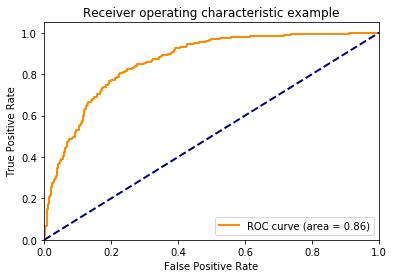

In [5]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, test_preds.mean(axis=1)))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('roc.png')
plt.show()

## 特征重要性

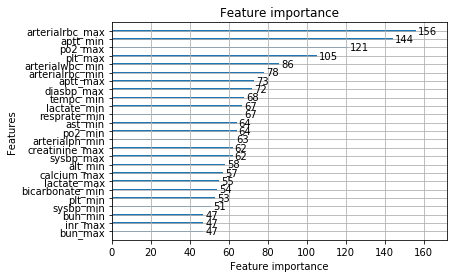

In [11]:
plt.figure(figsize=(100,20))
ax = lgb.plot_importance(gbm,max_num_features=25)
plt.gcf().savefig('feature_importance.png')
plt.show()

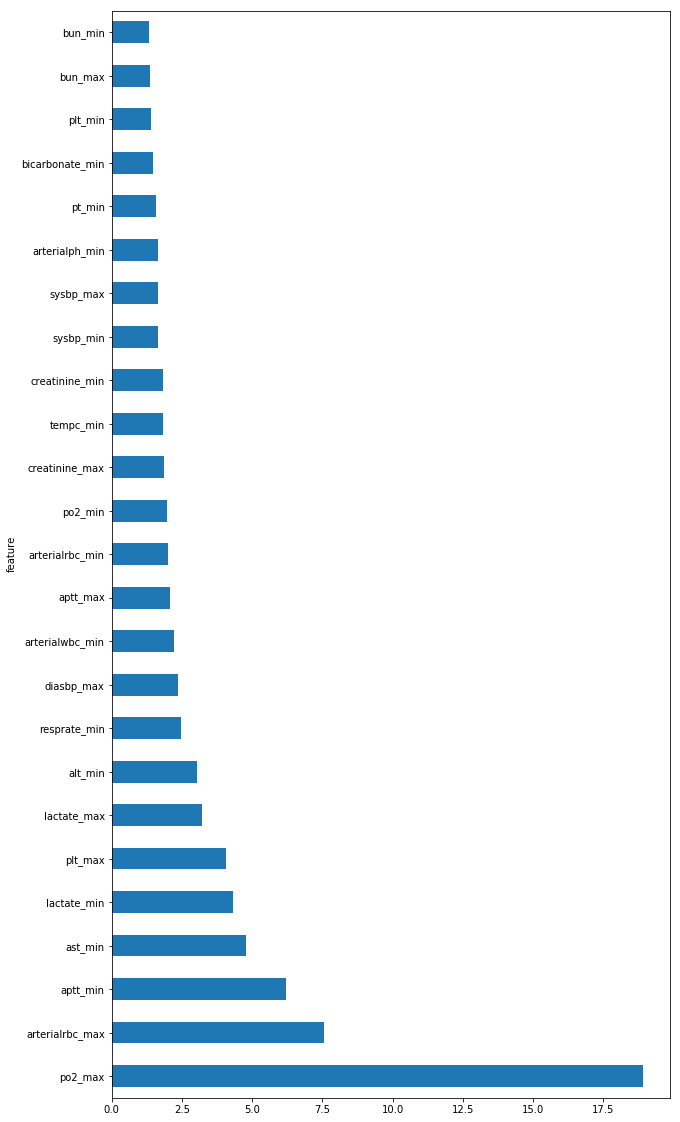

In [9]:
plt.figure()
feat_imp[['feature','gain']].head(25).plot(kind='barh', x='feature', y='gain', legend=False, figsize=(10, 20))
plt.gcf().savefig('features_importance.png')
plt.show()

## 树

In [10]:
import matplotlib.pyplot as plt
ax = lgb.plot_tree(gbm, tree_index=83, figsize=(20, 8), show_info=['split_gain'])
plt.show()

ExecutableNotFound: failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH